In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

In [2]:
emotion_identifier = tf.keras.models.load_model('emotion_identifier_model_2.h5')

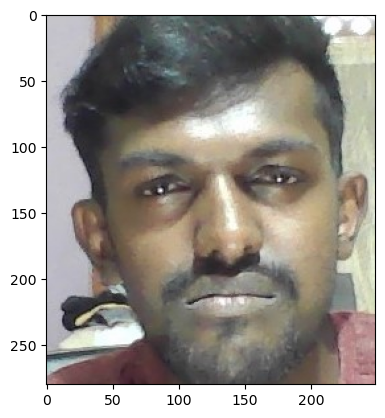

In [3]:
img = cv2.imread("bored.jpg")
img.shape

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [4]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
gray.shape

(280, 249)

In [7]:
faces = faceCascade.detectMultiScale(gray,1.1,4)

for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not Detected")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex: ex+ew]

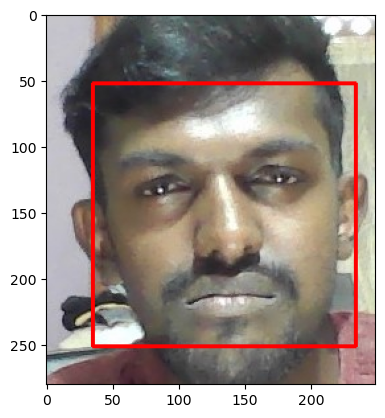

In [8]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

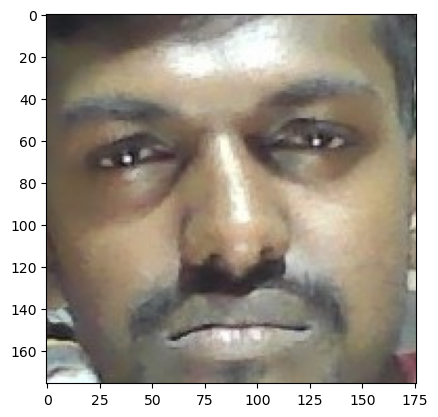

In [9]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [10]:
final_1 = cv2.resize(face_roi,(224, 224))
final_2 = np.expand_dims(final_1, axis = 0)
final_3 = final_2/255.0

In [11]:
predict = emotion_identifier.predict(final_3)

1/1 [==============================] - 1s 643ms/step


In [12]:
predict[0]

array([2.4392597e-04, 1.3422349e-02, 2.3882905e-05, 9.8630989e-01,
       4.4193039e-12, 4.3750632e-12, 3.4806478e-12], dtype=float32)

In [13]:
np.argmax(predict)

3